<a href="https://colab.research.google.com/github/StefanRaduMaris/ml-project-big-data/blob/main/notebook/product_review_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning big data training

## Objective

We will create an AI model from a dataset that have 170.000 rows.
We want to train our model to detect the emotion that our customers have, so the idea is to detect if the review is negative and positive and to find ways to emprove this

In [26]:
import pandas as pd
url = "https://raw.githubusercontent.com/StefanRaduMaris/ml-project-big-data/refs/heads/main/data/IMLP4_13-product_reviews_full.csv"
df=pd.read_csv(url)


Let check our data

In [27]:
df.head(5)

,review_uuid,product_name,product_price,review_title,review_text,sentiment
0,31b07b9a-4567-4db1-81f6-1bcef33b3e7b,Candes 12 L Room/Personal Air Cooler??????(Whi...,48.18,Super!,great cooler excellent air flow and for this p...,positive
1,1cb2b4b5-9805-4c2d-9393-6b1382cb7c53,Candes 12 L Room/Personal Air Cooler??????(Whi...,48.18,Awesome,best budget 2 fit cooler nice cooling,positive
2,f64165f0-29a2-4cfb-8b15-13c0c893e54d,Candes 12 L Room/Personal Air Cooler??????(Whi...,48.18,Fair,the quality is good but the power of air is de...,positive
3,e442e083-a343-4052-b015-41e531e52d3e,Candes 12 L Room/Personal Air Cooler??????(Whi...,48.18,Useless product,very bad product its a only a fan,negative
4,f4abefb8-22f0-4672-af73-2aa2954b24e0,Candes 12 L Room/Personal Air Cooler??????(Whi...,48.18,Fair,ok ok product,Neutral


Lenght of dataset

In [28]:
df.shape

(171380, 6)

Dataset information:

We need to check if we have Nan values.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171380 entries, 0 to 171379
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   review_uuid    171380 non-null  object
 1   product_name   171380 non-null  object
 2   product_price  170954 non-null  object
 3   review_title   171379 non-null  object
 4   review_text    171379 non-null  object
 5   sentiment      166369 non-null  object
dtypes: object(6)
memory usage: 7.8+ MB


I saw that we have NaN values so next step is to make a analyse on them.We have to take some decision like we want to keep them or to fill the rows.We have to have in consideration that we will train a AI model and he can be manipulate by those decision.

In [30]:
df.isna().sum()

,0
review_uuid,0
product_name,0
product_price,426
review_title,1
review_text,1
sentiment,5011


From this we can see that most of NaN values are in sentiment column and that is good because we can use those rows for new prediction, we have 1 review_text NaN that should be remove because without a text we can not predict the sentiment, product_price and review_title is not afecting our model.

Let`s see a graphic with this information

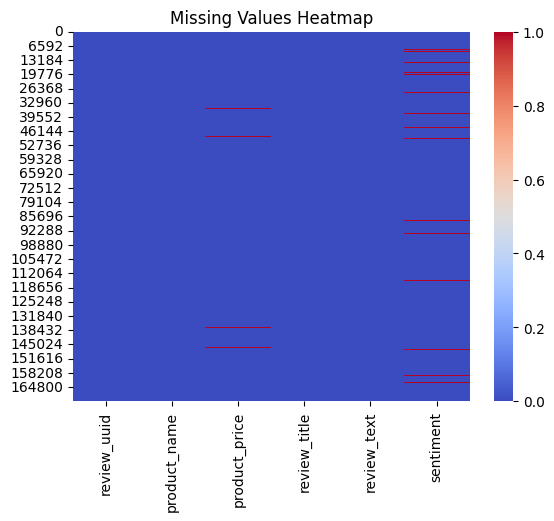

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isna(),cbar=True,cmap="coolwarm")
plt.title("Missing Values Heatmap")
plt.show()


The heatmap looks fine, but it’s difficult to extract specific information from it. However, it still confirms that we can use the data, even though the heatmap doesn’t include labels.

Next step it is to check the sentiment column.We want to see the values from that column.

In [59]:
from plotly.graph_objs import YAxis
import plotly.express as px
group=df.groupby('sentiment').agg(count=('sentiment','count')).reset_index()
print(group)
fig=px.bar(group,x='sentiment',y='count',title='Sentiments',color='sentiment')
fig.update_layout(yaxis_title='Count')
fig.show()

  sentiment  count
0  Negative  12392
1   Neutral   3202
2  Positive  22361
3  negative  32369
4   neutral  10508
5  positive  85537


From this graphic we can see that we have to solve couple of problem from our dataset because our reviews have some problems.We can see that our data have sometimes sentiment with Capitalize and sometimes no , so we have to solve this problem

Let's check the price column because we noticed that its type is object, not int as we expected.

In [61]:
# 1. Check the data type of the 'product_price' column
print("Data type of product_price column:", df['product_price'].dtype)

# 2. Display the first 10 values from the column
print("\nFirst 10 values in product_price column:")
print(df['product_price'].head(10))

# 3. Show the 20 most frequent values in the column
print("\nTop 20 most frequent values in product_price column:")
print(df['product_price'].value_counts().head(20))

# 4. Check for known non-numeric text values
problematic_values = ['Free', 'Not Available', 'N/A', 'None', '-', 'free', 'unknown', 'Unavailable']
# Identify rows containing these specific non-numeric values
mask_problematic = df['product_price'].astype(str).str.strip().isin(problematic_values)
df_problematic = df[mask_problematic]
print(f"\nFound {len(df_problematic)} rows with problematic textual values:")
display(df_problematic[['product_price']].drop_duplicates())

# 5. Find and display some of the non-numeric values
price_clean = df['product_price'].astype(str).str.strip()
price_numeric = pd.to_numeric(price_clean, errors='coerce')

invalid_prices = df[price_numeric.isna()]
print("Number of non-numeric prices:", len(invalid_prices))
display(invalid_prices[['product_price']].drop_duplicates().head(20))

Data type of product_price column: object

First 10 values in product_price column:
0    48.18
1    48.18
2    48.18
3    48.18
4    48.18
5    48.18
6    48.18
7    48.18
8    48.18
9    48.18
Name: product_price, dtype: object

Top 20 most frequent values in product_price column:
product_price
2.63        4483
5.41        2648
$5.41       2577
19.27       2575
$2.63       2499
42.16       2242
168.66      2175
8.42        2103
6.01        1857
373.48      1824
3.6         1778
18.06       1710
$19.27      1671
$3.60       1608
96.37       1496
$168.66     1461
3.0         1395
$6.01       1359
3.24        1333
2.4         1321
Name: count, dtype: int64

Found 0 rows with problematic textual values:


,product_price


Number of non-numeric prices: 68858


,product_price
22,NaN
34279,$6.86
34512,$2.76
34553,$6.95
35245,$4.35
36212,$19.27
36613,$21.67
36622,$7.22
36753,$9.63
36766,$7.82


#Removing NaN values

I will remove NaN values because i want relevant product in my dataset.

In [64]:
# Drop all rows with missing values
df = df.dropna()

# Display new shape of the dataset
print("New dataset shape:", df.shape)

# Count missing values per column
print("Missing values per column:")
print(df.isna().sum())

New dataset shape: (165960, 6)
Missing values per column:
review_uuid      0
product_name     0
product_price    0
review_title     0
review_text      0
sentiment        0
dtype: int64


Second way:

In [66]:
import pandas as pd
url = "https://raw.githubusercontent.com/StefanRaduMaris/ml-project-big-data/refs/heads/main/data/IMLP4_13-product_reviews_full.csv"
df=pd.read_csv(url)
# Count the number of rows before removing missing values
rows_before = len(df)

# Filter out rows that contain at least one missing value
rows_with_nan = df[df.isnull().any(axis=1)]

# Display a random sample of rows that will be removed
print("Randomly selected rows containing missing values:\n")
print(rows_with_nan.sample(n=min(5, len(rows_with_nan)), random_state=42))

# Remove rows with any missing values
df_cleaned = df.dropna()

# Count the number of rows after removing missing values
rows_after = len(df_cleaned)

# Show removal statistics
print("\n Removal statistics:")
print(f"- Number of rows before: {rows_before}")
print(f"- Number of rows after: {rows_after}")
print(f"- Number of removed rows: {rows_before - rows_after}")

Randomly selected rows containing missing values:

                                 review_uuid  \
138622  be155fca-c19b-4ca5-8a11-dcda5f334e18   
48332   0fcacd59-eb69-4c73-adb7-8bdd6c86cdbd   
10021   772ca541-7296-4065-b969-2eaef308623a   
9637    05b646fc-66a0-4d3b-a97a-ccb6b367eaa2   
156343  3a97cd00-5eea-4533-889c-c3ed7eedda36   

                                             product_name product_price  \
138622  SAMSUNG 253 L Frost Free Double Door 3 Star Re...      $295.06    
48332   Men Solid Single Breasted Casual Blazer??????(...       $38.54    
10021   CEAT Hitman Full Size Double Blade Poplar Cric...          3.96   
9637    Hindware Ripple 90 Auto Clean Wall Mounted Chi...        172.28   
156343  APPLE iPad (9th Gen) 64 GB ROM 10.2 inch with ...      $361.33    

                  review_title                            review_text  \
138622               Very Good  good design and effective performance   
48332                      Nan                                a

We will clean column price product because we and to have int values there.

In [68]:
# Step 1: Convert to string and remove the 'USD' prefix and any leading/trailing spaces
df['product_price_cleaned'] = (
    df['product_price']
    .astype(str)
    .str.replace(r'$', '', regex=True)    # Remove '$'
    .str.replace(r'[^\d.]', '', regex=True) # Remove all non-numeric characters except the dot
    .str.strip()
)
# Step 2: Convert cleaned string to float
df['product_price'] = pd.to_numeric(df['product_price_cleaned'], errors='coerce')
# Step 3: Drop the temporary column
df = df.drop(columns=['product_price_cleaned'])
# Step 4: Drop any rows where conversion failed (still NaN)
df = df.dropna(subset=['product_price'])# Step 5: Confirm result
print("Column type after parsing:", df['product_price'].dtype)
print("\nPrice summary:")
print(df['product_price'].describe())


Column type after parsing: float64

Price summary:
count    170954.000000
mean         65.709872
std         135.789769
min           0.180000
25%           4.190000
50%          14.450000
75%          66.250000
max        1566.140000
Name: product_price, dtype: float64


Let`s work with sentiment column now:

In [70]:
# Step 1: Convert all sentiment values to lowercase and strip extra spaces
df['sentiment'] = df['sentiment'].astype(str).str.lower().str.strip()

# Step 2: Show all unique values in the sentiment column
print("Unique sentiment values after cleaning:")
print(df['sentiment'].value_counts())

# Step 3: Convert column type to 'category'
df['sentiment'] = df['sentiment'].astype('category')
print("\nSentiment column converted to type:", df['sentiment'].dtype)

Unique sentiment values after cleaning:
sentiment
positive    107619
negative     44663
neutral      13678
nan           4994
Name: count, dtype: int64

Sentiment column converted to type: category
